<a href="https://colab.research.google.com/github/25071983/Challenge_Telecom_X/blob/main/1precios_de_inmuebles_regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#df = pd.read_csv('https://raw.https://github.com/alura-es-cursos/2145-data-science-probando-relaciones-con-regresion-lineal/blob/main/precios_casas.csv')

# 1. Ajustando una recta

## Conociendo los datos

In [5]:
#Leyendo los datos
import pandas as pd

In [6]:
datos = pd.read_csv("/content/precios_casas.csv")
datos.head()

,Id,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [7]:
#Cuáles factores fueron colectados
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Id                           1438 non-null   int64  
 1   area_primer_piso             1438 non-null   float64
 2   tiene_segundo_piso           1438 non-null   int64  
 3   area_segundo_piso            1438 non-null   float64
 4   cantidad_banos               1438 non-null   int64  
 5   capacidad_carros_garage      1438 non-null   int64  
 6   calidad_de_cocina_excelente  1438 non-null   int64  
 7   precio_de_venta              1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [8]:
datos = datos.drop(columns ='Id')

datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

## Correlación

**¿Cuáles factores están relacionados con el precio de la casa? ¿Cómo es esa relación?**

El coeficiente de correlación de Pearson nos permite medir la relación lineal entre variables, ofreciendo una escala que varía de -1 a 1, la cual interpretamos según su intensidad y dirección:

* **-1**: correlación negativa perfecta: a medida que una variable aumenta, la otra disminuye.  
* **0**: no hay relación lineal entre las variables.  
* **1**: correlación positiva perfecta: a medida que una variable aumenta, la otra también aumenta.  



In [9]:
# Correlación
corr = datos.corr()


In [10]:
corr[ 'precio_de_venta']

,precio_de_venta
area_primer_piso,0.616557
tiene_segundo_piso,0.138541
area_segundo_piso,0.305311
cantidad_banos,0.563132
capacidad_carros_garage,0.640214
calidad_de_cocina_excelente,0.496223
precio_de_venta,1.000000


In [11]:
# Actividad
# Cuáles factores están más correlacionados?




## Relacionando variables

In [12]:
# importando los paquetes para la visualización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

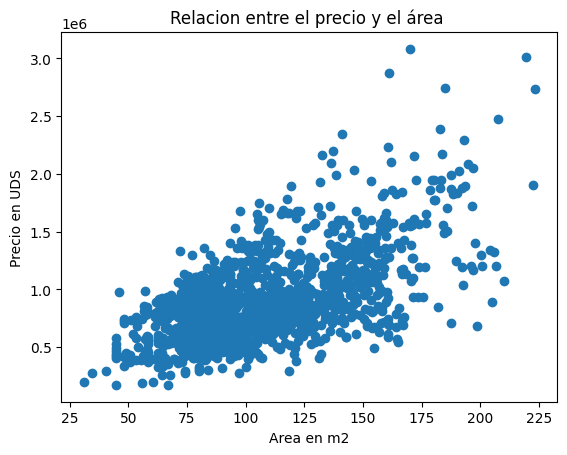

In [13]:
# Cómo se relacionan el área construída y el precio del inmueble?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.title('Relacion entre el precio y el área ')
plt.xlabel('Area en m2' )
plt.ylabel('Precio en UDS')
plt.show()

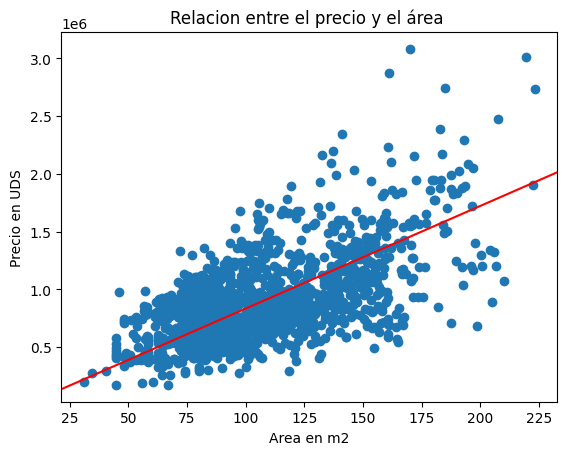

In [14]:
# Aparentemente mientras mayor es el área del primer piso, mayor es el precio de la casa.
# E si quisieramos trazar una línea que nos permita describir este comportamiento?
plt.scatter(datos['area_primer_piso'],datos['precio_de_venta'])
plt.axline(xy1=(40,300000),xy2=(175,1500000),color='red')
plt.title('Relacion entre el precio y el área ')
plt.xlabel('Area en m2' )
plt.ylabel('Precio en UDS')
plt.show()


## Mejor recta

In [15]:
# Cuál es la recta que mejor se ajusta a esta relación
px.scatter(datos,x='area_primer_piso',y='precio_de_venta',trendline_color_override='red',trendline='ols')

# 2. Explicando la recta
Ajustamos una recta entre los $m^2$ del primer piso y el precio de la casa. Queremos explicar el precio de la casa a partir de su tamaño, por eso decimos que:

* Variable explicativa/independiente: Área del primer piso  
* Variable de respuesta/dependiente: Precio de la casa  

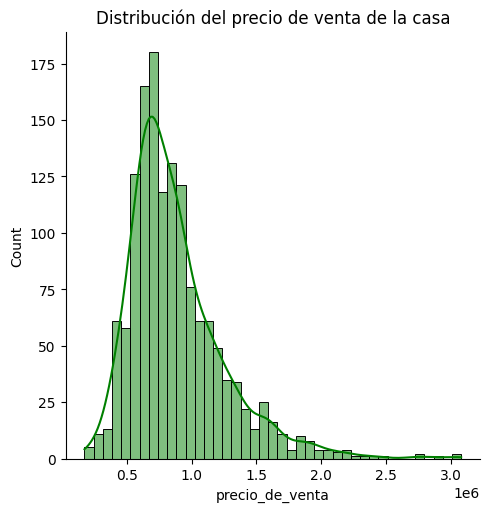

In [16]:
#Quién es nuestra variable de respuesta?
sns.displot(datos['precio_de_venta'],kde=True,color='green')
plt.title('Distribución del precio de venta de la casa')
plt.show()

### Separando datos para entrenamiento y para prueba

El conjunto de **entrenamiento** se utiliza para ajustar el modelo, mientras que el conjunto de **prueba** se usa para evaluar su desempeño al predecir precios de viviendas no vistos durante el entrenamiento, lo que ayuda a la generalización del modelo.

In [17]:
# import train_test_split (tomar la base y separar)
from sklearn.model_selection import train_test_split

y= datos['precio_de_venta']
X= datos.drop(columns='precio_de_venta')

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=230)#garantizr la reproductibilidad de la segregacion de los datos


In [18]:
#Datos de entrenamiento para usar la fórmula
df_train =pd.DataFrame(x_train)
df_train['precio_de_venta'] = y_train
df_train.head()



,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente,precio_de_venta
1303,65.7732,0,0.0000,1,0,0,406725.0
326,55.3684,1,55.3684,1,189,0,384540.0
386,74.6916,1,107.4853,2,560,0,1059950.0
615,103.6764,0,0.0000,1,440,0,788800.0
236,94.2006,1,67.8170,2,457,0,958885.0


In [19]:
# import ols (tecnica de los minimos cuadrados)
from statsmodels.formula.api import ols

In [20]:
# ajustando el primer modelo(fit ajusta el modelo)
modelo_0= ols('precio_de_venta ~ area_primer_piso',data=df_train).fit()

## Analizando los coeficientes

(intensidad, dirección y significancia)




In [21]:
# visualizando los parámetros
modelo_0.params

,0
Intercept,152909.288334
area_primer_piso,6793.641641


In [22]:
# El resumen del modelo
modelo_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        01:42:53   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.529e+05   3.07e+04      4.981      0.000    9.27e+04    2.13e+05
area_primer_piso  6793.6416    275.455     24.663      0.000    6253.109    7334.175
==============================================================================
Omnibus:                      190.778   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              482.457
Skew:                           0.998   Prob(JB):                    1.72e-105
Kurtosis:                       5.743   Cond. No.                         373.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- El **punto de intercepción** es el valor esperado del precio de la casa cuando todas las demás variables son cero. En este caso, cuando todas las demás variables, incluida el área del primer piso, son cero, el precio esperado de la casa es de $145.196,40. No siempre se tiene una interpretación práctica para este número.

- El **efecto individual** del área es de \$6.833,97. Esto indica que por cada metro cuadrado adicional al área del primer piso, se espera que el precio de la casa aumente en promedio \$6.833,97.

<img src="https://i.ibb.co/CJwfMgW/coeficientes.png" alt="coeficientes" border="0">


## Explicabilidad del modelo

**¿En qué medida la variación del área explica los diversos precios de las casas?**  

En este caso, recurrimos a la métrica R², el coeficiente de determinación. El R² varía de 0 a 1, donde 1 indica un ajuste perfecto del modelo a los datos, es decir, todas las variaciones en la variable dependiente son explicadas por las variables independientes en el modelo. Por otro lado, un R² de 0 indica que el modelo no explica ninguna variabilidad en la variable dependiente.

In [23]:
# observando el R² (ajuste 0 no se ajusta , 1 )
modelo_0.rsquared
#Tambien puedo represntar el codigo de la siguinte forma redomdea el resultado
round(modelo_0.rsquared,2)

np.float64(0.38)

## Entendiendo el resíduo

In [24]:
# Quiénes son los residuos? debe ser el mas cerncano a 0
modelo_0.resid

,0
1303,-193023.838744
326,-144522.356193
386,399612.747641
615,-68449.596607
236,166010.592859
...,...
777,465872.680999
271,-497642.319788
723,461150.204718
560,-540482.733402


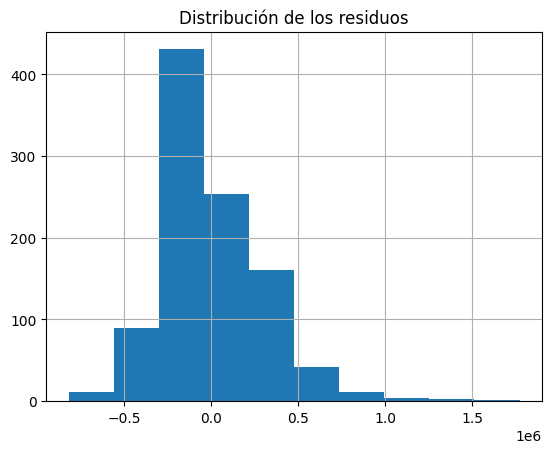

In [25]:
# Cómo están distribuidos
modelo_0.resid.hist()
plt.title('Distribución de los residuos')
plt.show()

<img src="https://i.ibb.co/zGTB35V/residuos.png" alt="residuos" border="0">

## Obteniendo el R² de la previsión

In [26]:
# definiendo la 'Y' prevista
y_pred = modelo_0.predict(x_test)

In [27]:
# importando el r2_score
from sklearn.metrics import r2_score



In [28]:
# mostrando el resultado de r²

print(f'El coeficiente de determinacion R² para el modelo con los datos de prueba:{round(r2_score(y_test,y_pred),2) }')


El coeficiente de determinacion R² para el modelo con los datos de prueba:0.39


# 3. Añadiendo otras características

El modelo con un solo factor nos mostró un R² de 0.38, es decir, aproximadamente el 38% de la variación observada en los precios de las casas puede explicarse por la variación en el área.  
Esto indica que aún existe una cantidad significativa de variación que no está siendo capturada por este modelo específico. Analizaremos otros factores para explicar el precio de las casas.

## Analizando los factores

In [29]:
# cuáles otras características podrían explicar el precio de los inmuebles?


In [30]:
#Vamos a analizar solamente y_vars='precio_de_venta'


## Añadiendo factores al modelo

In [31]:
# importando la api de statsmodels
import statsmodels.api as sm

In [32]:
# Añadiendo una constante
x_train = sm.add_constant(x_train)
x_train.head()

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
1303,1.0,65.7732,0,0.0000,1,0,0
326,1.0,55.3684,1,55.3684,1,189,0
386,1.0,74.6916,1,107.4853,2,560,0
615,1.0,103.6764,0,0.0000,1,440,0
236,1.0,94.2006,1,67.8170,2,457,0


In [33]:
x_train.columns

Index(['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente'],
      dtype='object')

In [34]:
# Creando el modelo de regresión (con todas las variables): saturado
modelo_1 = sm.OLS(y_train,x_train[['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [35]:
# Modelo sin el área del segundo piso
modelo_2 = sm.OLS(y_train,x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']]).fit()

In [36]:
# Modelo sin la información del garage
# Modelo sin el área del segundo piso
modelo_3 = sm.OLS(y_train,x_train[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']]).fit()

In [37]:
# Resumen del modelos
modelos = [modelo_0,modelo_1,modelo_2,modelo_3]
for i,j in enumerate(modelos):
  print(f'....................................................\n..........................El modelo{i}tiene el siguiente resumenn....................................................\n')
  print(j.summary(),'\n\n')

....................................................
..........................El modelo0tiene el siguiente resumenn....................................................

                            OLS Regression Results                            
Dep. Variable:        precio_de_venta   R-squared:                       0.377
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     608.3
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          2.22e-105
Time:                        01:42:53   Log-Likelihood:                -14082.
No. Observations:                1006   AIC:                         2.817e+04
Df Residuals:                    1004   BIC:                         2.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err  

In [38]:
for i,j in enumerate(modelos):
  print(f'El coeficiente de determinacion R² del modelo {i}:{j.rsquared.round(2)}')

El coeficiente de determinacion R² del modelo 0:0.38
El coeficiente de determinacion R² del modelo 1:0.74
El coeficiente de determinacion R² del modelo 2:0.71
El coeficiente de determinacion R² del modelo 3:0.65


## Comparando los modelos
Cuál es el modelo?


In [39]:
# Cuántos parámetros tiene el modelo?
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


# 4. Precificando las casas

## Obteniendo el R² de la previsión

In [40]:
# Añadiendo una constante en X_test
x_test = sm.add_constant(x_test)
x_test.head(2)

,const,area_primer_piso,tiene_segundo_piso,area_segundo_piso,cantidad_banos,capacidad_carros_garage,calidad_de_cocina_excelente
997,1.0,94.9438,0,0.0000,1,280,0
805,1.0,74.1342,1,78.2218,2,595,0


In [41]:
# Previsión con el modelo 3
prevision_3 = modelo_3.predict(x_test[['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']])

In [42]:
# Cuál es el r² de la previsión?
print(f'El coeficiente R² de la base de prevision es:{modelo_3.rsquared.round(2)}')

El coeficiente R² de la base de prevision es:0.65


In [43]:
# Cuál es el R² del entrenamiento?
print(f'El coeficiente R² con respto a la base de entrenamiento es:{round(r2_score(y_test,prevision_3),2)}')

El coeficiente R² con respto a la base de entrenamiento es:0.64


## Precificando una casa

<img src="https://i.ibb.co/SvG4V4j/costo.png" alt="costo" border="0">

In [44]:
datos.columns

Index(['area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente', 'precio_de_venta'],
      dtype='object')

In [45]:
#Nuevo inmueble
nuevo_inmueble =pd.DataFrame({
    'const':[1],
    'area_primer_piso':[120],
    'tiene_segundo_piso':[1],
    'cantidad_banos':[2],
    'calidad_de_cocina_excelente':[0]
})

In [46]:
# Cuál es el precio del inmueble de acuerdo con el modelo 0?
modelo_0.predict(nuevo_inmueble['area_primer_piso']).round(2)

,0
0,968146.29


In [47]:
#Cuál es el precio del inmueble de acuerdo con el modelo 3?
modelo_3.predict(nuevo_inmueble).round(2)

,0
0,1123758.24


In [48]:
modelo_3.params

,0
const,-129979.678094
area_primer_piso,6119.653184
tiene_segundo_piso,221306.959705
cantidad_banos,149036.289458
calidad_de_cocina_excelente,444391.228573


## Precificando varias casas

<img src="https://i.imgur.com/i0skFlB.jpeg" width="600"/>

In [49]:
# Leyendo varias casas?
#df = pd.read_csv('https://raw.githubusercontent.com/alura-es-cursos/2145-data-science-probando-relaciones-con-regresion-lineal/main/nuevas_casas.csv')

nuevas_casas = pd.read_csv('/content/nuevas_casas.csv', sep=';nuevas')
nuevas_casas.head(2)

/tmp/ipython-input-49-1206338286.py:4: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,Casa;area_primer_piso;tiene_segundo_piso;cantidad_banos;calidad_de_cocina_excelente
0,1;150;1;2;1
1,2;180;0;3;1


In [50]:
nuevas_casas.drop(columns='Casa',inplace=True)


KeyError: "['Casa'] not found in axis"

In [ ]:
# Añadiendo una constante
nuevas_casas = sm.add_constant(nuevas_casas)


In [ ]:
# Cuál es el precio de estas nuevas casas?
# precio_casas = pd.DataFrame()

nuevas_casas['Previo de Venta'] = modelo_3.predict(nuevas_casas).round(2)
nuevas_casas

# 5. Investigando el modelo





## Multicolinearidad

Cuando dos o más cosas que estás intentando estudiar son tan parecidas que es difícil determinar cuánto está influyendo cada una de ellas en el resultado.

In [51]:
# importar el VIF de statsmodel
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [52]:
explicativas_1 =['const', 'area_primer_piso', 'tiene_segundo_piso', 'area_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']
explicativas_2 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'capacidad_carros_garage',
       'calidad_de_cocina_excelente']
explicativas_3 = ['const', 'area_primer_piso', 'tiene_segundo_piso',
       'cantidad_banos', 'calidad_de_cocina_excelente']

In [53]:
# VIF 1
vif_1 = pd.DataFrame()
vif_1['variables'] = explicativas_1
vif_1['vif'] = [vif(x_train[explicativas_1],i) for i in range(len(explicativas_1))]
vif_1


,variables,vif
0,const,20.230833
1,area_primer_piso,2.193680
2,tiene_segundo_piso,7.455059
3,area_segundo_piso,7.589396
4,cantidad_banos,1.720795
5,capacidad_carros_garage,1.570078
6,calidad_de_cocina_excelente,1.182606


In [54]:
# VIF 3
vif_3 = pd.DataFrame()
vif_3['variables'] = explicativas_3
vif_3['vif'] = [vif(x_train[explicativas_3],i) for i in range(len(explicativas_3))]
vif_3

,variables,vif
0,const,18.773457
1,area_primer_piso,1.919046
2,tiene_segundo_piso,1.644067
3,cantidad_banos,1.539255
4,calidad_de_cocina_excelente,1.151795


## Análisis de los residuos

Residuos: la discrepancia entre los valores reales y los valores que el modelo predice para los mismos puntos de datos.

In [55]:
#Prevision de los valores de entrenamiento X_train[explicati_3]
y_previsto_train = modelo_3.predict(x_train[explicativas_3])

In [56]:
# Generarando un scatter entre y_previsto e y_train
fig = px.scatter(x=y_previsto_train,y=y_train,title='Valor Previstos vs Valor Real',labels={'x':'Valor Previstos','y':'Valor Real'})
fig.show()

In [58]:
# Residuos
residuos= modelo_3.resid
fig = px.scatter(x=y_previsto_train,y=residuos,title='Valor Previstos vs Residuos',labels={'x':'Valor Previstos','y':'Residuos'})
fig.show()

<img src="https://i.ibb.co/9bmySbm/heterocedasticidad.png" alt="heterocedasticidad" border="0">